# Exploratory Data Analysis (EDA) and baseline modeling

## === 1. Setup ===

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)
import joblib
import os

## === 2. Load Clean Dataset ===

In [2]:
file_path = "../data/processed/framingham_clean.csv"
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(df.shape)
df.head()

✅ Dataset loaded successfully!
(4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.153113,-1.234283,2.006069,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,-0.940086,-1.196267,-1.083027,0.287693,0.342792,-0.201287,0
1,-0.867217,-0.417664,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,0.300797,-0.515399,-0.159355,0.720094,1.590451,-0.245036,0
2,1.153113,-0.184345,-0.973172,1.011863,0.928784,-0.173569,-0.077014,-0.671241,-0.162437,0.187990,-0.220356,-0.243325,-0.112769,-0.073094,-0.507530,0
3,-0.867217,1.332233,1.012988,1.011863,1.768882,-0.173569,-0.077014,1.489778,-0.162437,-0.263241,0.800946,1.016227,0.683242,-0.904866,0.936188,1
4,-0.867217,-0.417664,1.012988,1.011863,1.180813,-0.173569,-0.077014,-0.671241,-0.162437,1.090450,-0.106878,0.092555,-0.663098,0.758678,0.148705,0


## === 3. Basic EDA ===


=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 5

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4240.000000
mean,-1.206582e-16,1.202392e-16,-3.435407e-17,-1.005485e-17,-5.362587e-17,6.535653e-17,1.005485e-16,6.032910e-17,1.340647e-17,-1.051570e-16,-3.351617e-17,1.675808e-18,3.871117e-16,1.307131e-16,1.147929e-16,0.151887
std,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,0.358953
min,-8.672175e-01,-2.050902e+00,-9.731716e-01,-9.882763e-01,-7.514122e-01,-1.735694e-01,-7.701427e-02,-6.712410e-01,-1.624373e-01,-2.925500e+00,-2.217569e+00,-2.930371e+00,-2.520458e+00,-2.651589e+00,-1.820001e+00,0.000000
25%,-8.672175e-01,-8.843035e-01,-9.731716e-01,-9.882763e-01,-7.514122e-01,-1.735694e-01,-7.701427e-02,-6.712410e-01,-1.624373e-01,-6.919097e-01,-6.969637e-01,-6.631763e-01,-6.686260e-01,-6.553347e-01,-4.200321e-01,0.000000
50%,-8.672175e-01,-6.768471e-02,1.990844e-02,-9.882763e-01,-7.514122e-01,-1.735694e-01,-7.701427e-02,-6.712410e-01,-1.624373e-01,-6.018712e-02,-1.976605e-01,-7.538502e-02,-9.802846e-02,-7.309396e-02,-1.575378e-01,0.000000
75%,1.153113e+00,7.489341e-01,1.012988e+00,1.011863e+00,9.287838e-01,-1.735694e-01,-7.701427e-02,1.489778e+00,-1.624373e-01,5.715355e-01,5.285987e-01,5.963764e-01,5.487306e-01,5.923240e-01,1.487055e-01,0.000000
max,1.153113e+00,2.382172e+00,2.006069e+00,1.011863e+00,5.129274e+00,5.761384e+00,1.298461e+01,1.489778e+00,6.156223e+00,1.036324e+01,7.382670e+00,5.004811e+00,7.616401e+00,5.582959e+00,1.366716e+01,1.000000


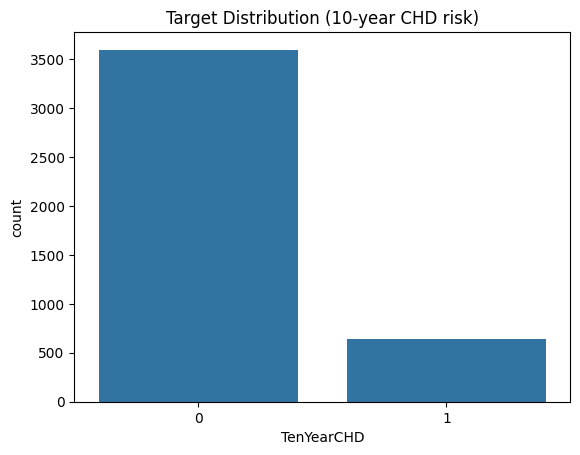

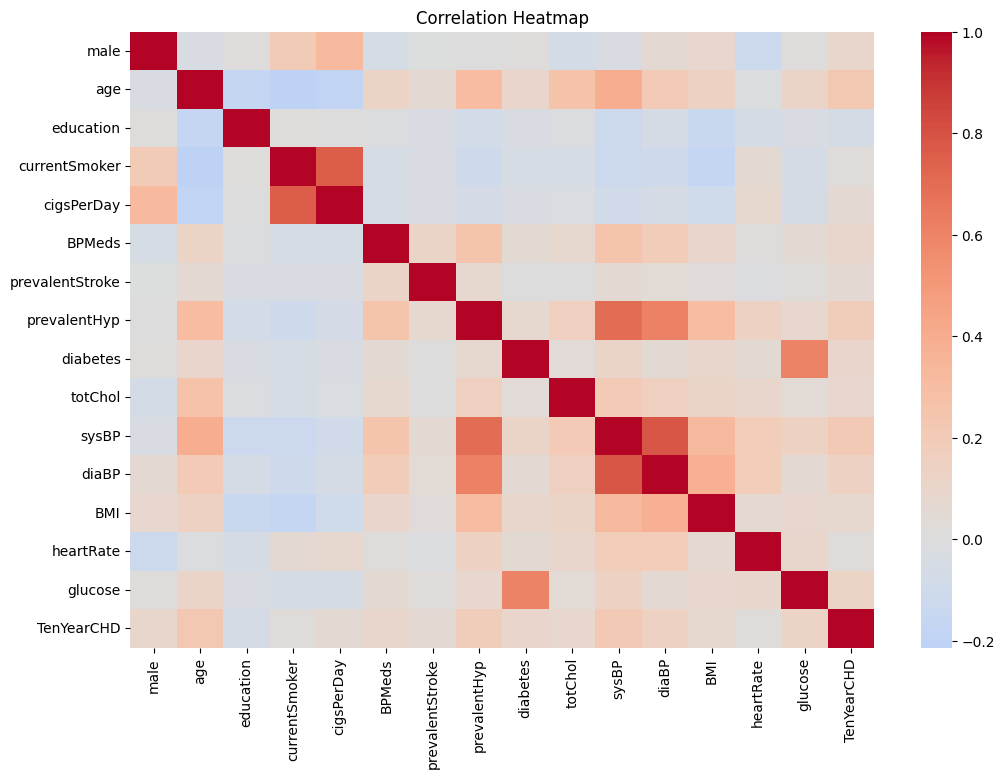

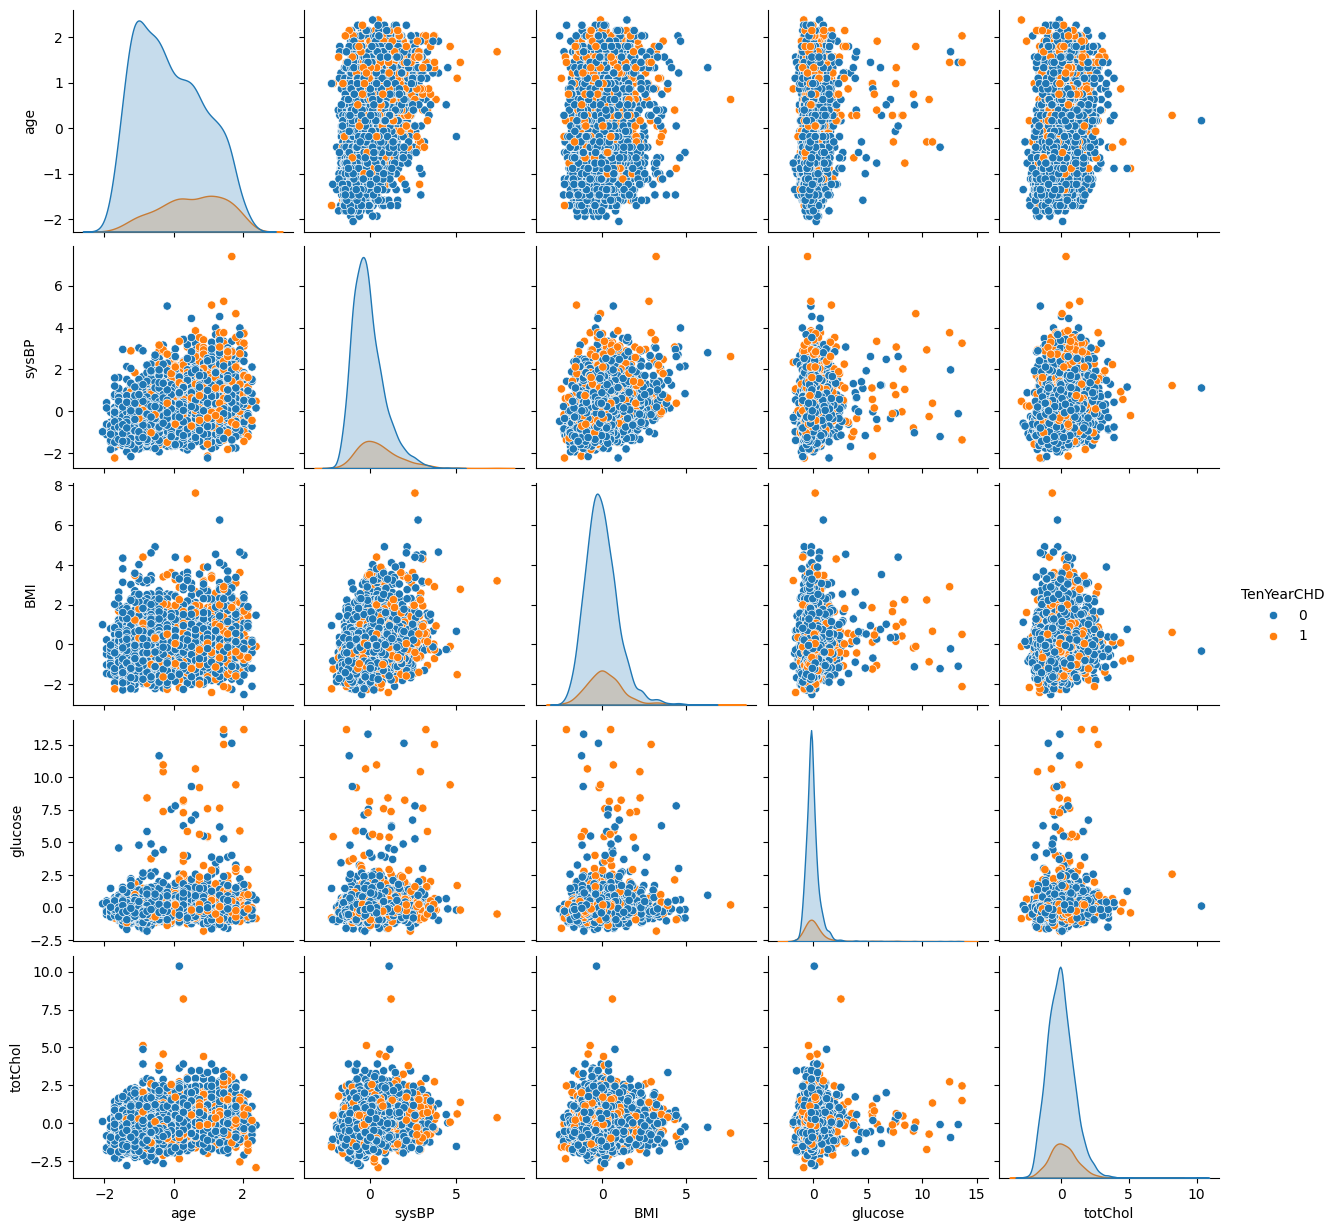

In [3]:
print("\n=== Basic Info ===")
print(df.info())

print("\n=== Descriptive Statistics ===")
display(df.describe())

# Distribution of target
sns.countplot(x='TenYearCHD', data=df)
plt.title("Target Distribution (10-year CHD risk)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for some important features
important_features = ['age', 'sysBP', 'BMI', 'glucose', 'totChol', 'TenYearCHD']
sns.pairplot(df[important_features], hue="TenYearCHD", diag_kind="kde")
plt.show()

## === 4. Prepare Data for Modeling ===

In [4]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Data split complete:")
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


✅ Data split complete:
Train set: (3392, 15), Test set: (848, 15)


## === 5. Train Models ===

In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    results.append(metrics)
    print(f"\n✅ {name} trained successfully.")


✅ Logistic Regression trained successfully.

✅ Random Forest trained successfully.

✅ Gradient Boosting trained successfully.


## === 6. Results Summary ===

In [6]:
results_df = pd.DataFrame(results)
print("\n=== Model Performance ===")
display(results_df.sort_values(by="ROC-AUC", ascending=False))


=== Model Performance ===


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.844340,0.411765,0.054264,0.095890,0.702192
2,Gradient Boosting,0.843160,0.416667,0.077519,0.130719,0.660419
1,Random Forest,0.847877,0.500000,0.046512,0.085106,0.643675


## === 7. Visualizations ===

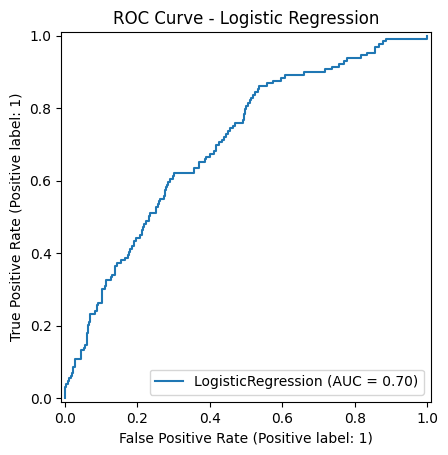

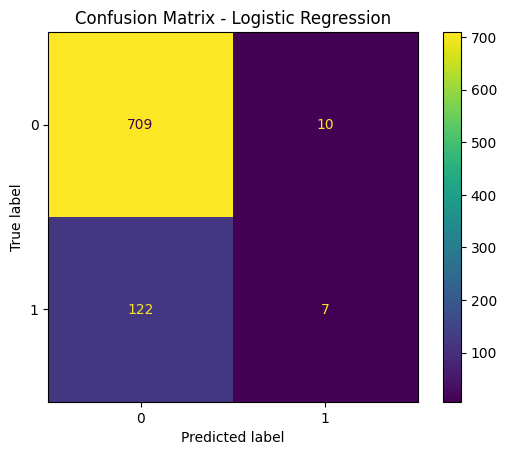

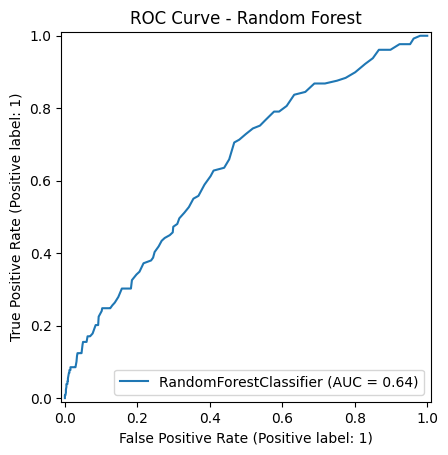

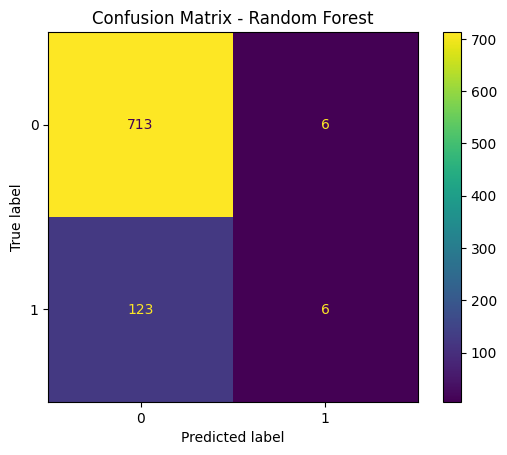

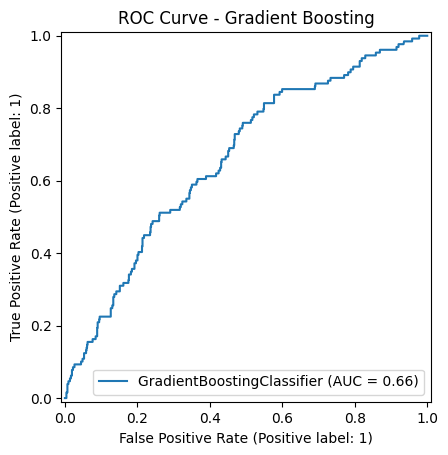

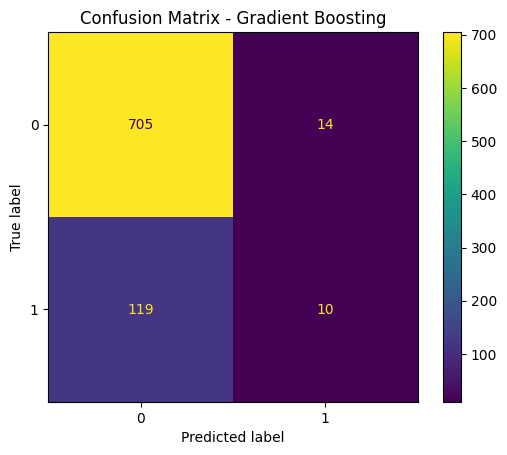

In [7]:
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f"ROC Curve - {name}")
    plt.show()

    cm = confusion_matrix(y_test, model.predict(X_test_scaled))
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

## === 8. Save Models and Results ===

In [8]:
os.makedirs("../models", exist_ok=True)
os.makedirs("../data/results", exist_ok=True)

for name, model in models.items():
    path = f"../models/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, path)
    print(f"💾 Saved model: {path}")

results_df.to_csv("../data/results/model_results.csv", index=False)
print("💾 Results saved to ../data/results/model_results.csv")

💾 Saved model: ../models/logistic_regression.pkl
💾 Saved model: ../models/random_forest.pkl
💾 Saved model: ../models/gradient_boosting.pkl
💾 Results saved to ../data/results/model_results.csv


## === 9. Save Scaler ===

In [9]:
joblib.dump(scaler, "../models/scaler.pkl")
print("💾 Scaler saved to ../models/scaler.pkl")

print("\n✅ Exploration and modeling completed successfully!")

💾 Scaler saved to ../models/scaler.pkl

✅ Exploration and modeling completed successfully!
